# CLUSTERING: KMeans


In [16]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [17]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/df.csv')

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,0,...,12,3,0,2,3,3,2,2,2,1
1,20,0,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,0,...,13,4,1,1,3,3,1,0,0,0
2,37,0,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,1,...,13,3,0,10,2,3,3,2,0,2
3,39,0,Travel_Rarely,1354,Research & Development,5,3,Medical,3,1,...,12,4,0,14,3,3,10,10,5,8
4,35,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,1,...,13,2,1,15,3,3,13,12,5,11


In [21]:
df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

In [23]:
features_selected = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [25]:
X = df[features_selected]
X.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,TotalSatisfaction
0,31,9,7978.000000,2,2,10
1,20,2,2323.000000,1,1,9
2,37,17,3375.000000,10,3,8
3,39,5,3069.000000,14,10,8
4,35,1,8264.307692,15,13,7


In [26]:
# normalize
scaler = RobustScaler()
X = scaler.fit_transform(X)

### Find optimal k

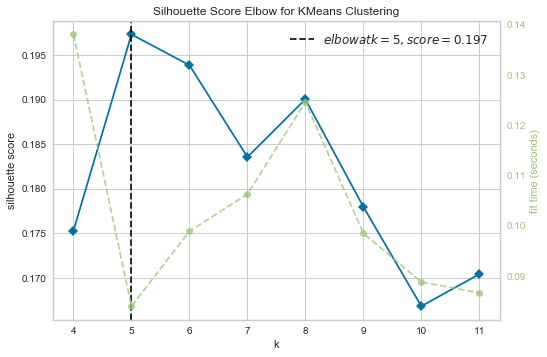

In [29]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [32]:
for k in range(4,13):
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(X)
    print(f'K = {k} | SSE: {model.inertia_} | Silohuette: {silhouette_score(X, model.labels_)}')

K = 4 | SSE: 1147.2947958308393 | Silohuette: 0.18213226871009108
K = 5 | SSE: 1019.8363064080128 | Silohuette: 0.19577366545887462
K = 6 | SSE: 935.6673375187219 | Silohuette: 0.19525545792856713
K = 7 | SSE: 863.6535431884929 | Silohuette: 0.18100489665229427
K = 8 | SSE: 805.849487335572 | Silohuette: 0.18938193612398752
K = 9 | SSE: 766.1225488328184 | Silohuette: 0.1773397882321504
K = 10 | SSE: 738.1563528283684 | Silohuette: 0.17264038832530204
K = 11 | SSE: 714.7889707499288 | Silohuette: 0.16065347046899534
K = 12 | SSE: 686.7477889606557 | Silohuette: 0.15668225493837748


In [33]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=5)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(3,random_state=42)

pca.fit(X)
pca_proj = pca.transform(X)

In [84]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['cluster'] = kmeans.labels_
pca_proj.head()

,pca1,pca2,pca3,cluster
0,0.643008,-0.892691,1.548968,1
1,0.194164,-2.767674,0.534478,1
2,-1.099400,-0.245521,-0.961546,3
3,1.990437,-0.264458,-1.018999,0
4,0.244125,1.456529,0.347953,2


### Visualize Clusters

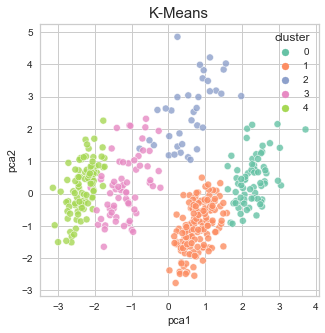

In [85]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("K-Means", fontsize= 15)
plt.show()

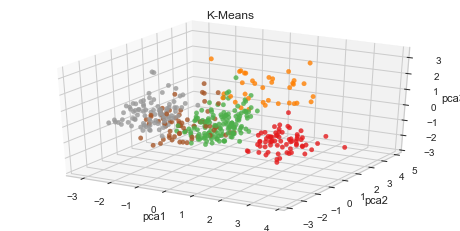

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = pca_proj['pca1']
y = pca_proj['pca2']
z = pca_proj['pca3']
c = pca_proj['cluster']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='Set1', alpha=0.8)
ax.set_title('K-Means')
plt.show()
 


In [96]:
X = pd.DataFrame(X, columns=features_selected)
X['clusters'] = kmeans.labels_

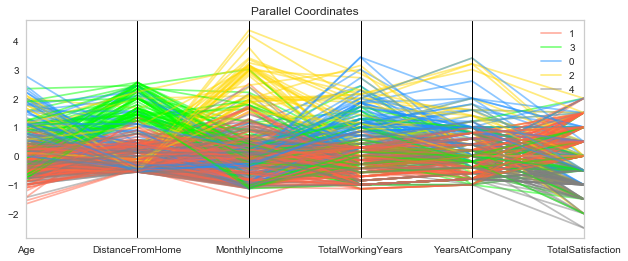

In [97]:
plt.figure(figsize=(10,4))
plt.title('Parallel Coordinates')
pd.plotting.parallel_coordinates(X, "clusters", color= ["tomato", "lime", "dodgerblue", "gold", "grey"], alpha=0.5);

In [99]:
X['Attrition'] = df['Attrition']

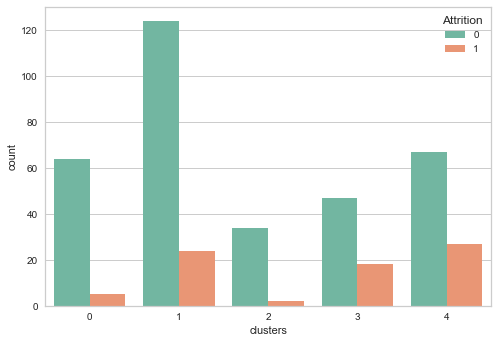

In [101]:
sns.countplot(x="clusters", hue="Attrition", data=X, palette="Set2")